In [227]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from json import loads, dumps
import math
import matplotlib



# Benchmark - Acc + Feat selection time - Tree

In [327]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark-final"
tfd_filename = "results_autofeat.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"
join_all_filename = "results_join_all.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)
df_ja = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{join_all_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base, df_ja])
# dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])


# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'
dataframe.loc[dataframe['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
dataframe.loc[dataframe['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAll+F'



# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)
dataframe['feature_selection_time'] = dataframe['feature_selection_time'].fillna(0)


['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'credit', 'covertype', 'school', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE', 'JoinAll', 'JoinAll+F']


<Figure size 640x480 with 0 Axes>

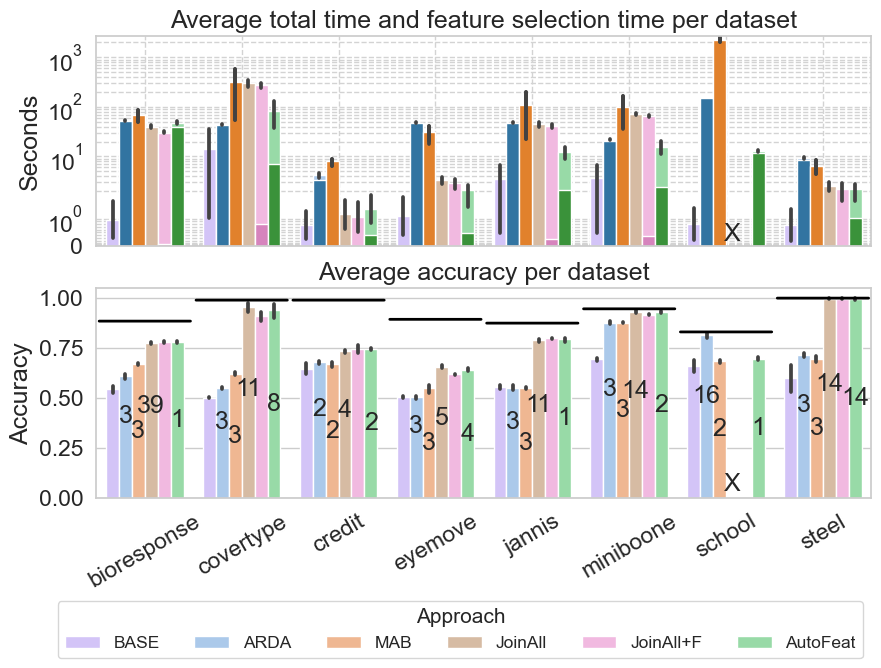

In [331]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")
pal2 = sns.color_palette('tab10')


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# df_basic.sort_values('data_label')

time_variable = 'feature_selection_time'
df = dataframe[dataframe['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]

# df = dataframe


# total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', time_variable])[['accuracy']].idxmax()
total_time = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]
taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
# taux = taux[~taux['approach'].isin(['BASE'])]

accuracy_cls = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]

# accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y='total_time', hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll+F', 'AutoFeat'], ax=ax1)

ax1 = sns.barplot(x="data_label", y=time_variable, hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
                palette=[pal2[4], pal2[0], pal2[1], pal2[5], pal2[6], pal2[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll+F', 'AutoFeat'], ax=ax1)




ax1.set_title("Average total time and feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('symlog')
# ax1.set_ylim()
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')
ax1.bar_label(ax1.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge')



ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll+F', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset") 
ax2.set_xticklabels(labels, rotation=30)
ax2.set_yticks(np.arange(0, 1.1, 0.25))


autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, '', 14]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='center', padding=10)
ax2.bar_label(ax2.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)
ax2.bar_label(ax2.containers[5], labels=autofeat_tables, label_type='center')

ax2.annotate('',xy=(0.5, 0.885),xytext=(-0.5, 0.885), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(1.5, 0.99),xytext=(0.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(2.5, 0.99),xytext=(1.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(3.5, 0.894),xytext=(2.5, 0.894), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(4.5, 0.875),xytext=(3.5, 0.875), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(5.5, 0.9465),xytext=(4.5, 0.9465), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(6.5, 0.831),xytext=(5.5, 0.831), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(7.5, 1.0),xytext=(6.5, 1.0), arrowprops=dict(arrowstyle="-", color='black', lw=2))


loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')

plt.savefig('plots/revision/benchmark-all.pdf', dpi=300, bbox_inches="tight")

In [332]:
aux.groupby(by=['data_label', 'approach']).max('accuracy')

total_time  feature_selection_time  accuracy  \
data_label  approach                                                   
bioresponse ARDA         53.262697               51.701897  0.623333   
            AutoFeat     54.803325               39.627401  0.784571   
            BASE          1.669011                0.000000  0.569141   
            JoinAll      43.905720                0.000000  0.783115   
            JoinAll+F    32.702948                0.074846  0.788937   
            MAB          93.240000               93.240000  0.675400   
covertype   ARDA         44.188069               42.662697  0.556667   
            AutoFeat    160.609625                6.942177  0.970544   
            BASE         47.317562                0.000000  0.503623   
            JoinAll     391.620282                0.000000  0.974202   
            JoinAll+F   330.105919                0.804420  0.931824   
            MAB         725.180000              725.180000  0.634040   
credit      ARDA          4.657694                3.390326  0.690000   
            AutoFeat      1.850615                0.388358  0.750000   
            BASE          1.278346                0.000000  0.690000   
            JoinAll       1.693252                0.000000  0.745000   
            JoinAll+F     1.604757                0.003011  0.775000   
            MAB           9.110000                9.110000  0.685000   
eyemove     ARDA         48.619539               47.100549  0.511667   
            AutoFeat      2.727467                0.459549  0.658344   
            BASE          1.880908                0.000000  0.513141   
            JoinAll       3.814097                0.000000  0.670171   
            JoinAll+F     3.558273                0.011015  0.622865   
            MAB          44.130000               44.130000  0.566360   
jannis      ARDA         48.578483               47.017040  0.573333   
            AutoFeat     17.596032                2.136092  0.803143   
            BASE          7.060490                0.000000  0.567906   
            JoinAll      51.531589                0.000000  0.798367   
            JoinAll+F    44.899263                0.254710  0.804272   
            MAB         221.820000              221.820000  0.559222   
miniboone   ARDA         22.161828               20.608685  0.890000   
            AutoFeat     22.438813                2.376915  0.939726   
            BASE          7.686720                0.000000  0.702603   
            JoinAll      77.430370                0.000000  0.942055   
            JoinAll+F    71.179759                0.364339  0.921096   
            MAB         168.290000              168.290000  0.879795   
school      ARDA        155.690314              153.726229  0.833803   
            AutoFeat     13.522206               11.954049  0.709859   
            BASE          1.384611                0.000000  0.709859   
            MAB        2726.070000             2726.070000  0.695775   
steel       ARDA          9.873774                8.403135  0.727506   
            AutoFeat      2.723553                1.036712  1.000000   
            BASE          1.359065                0.000000  0.668380   
            JoinAll       3.098659                0.000000  1.000000   
            JoinAll+F     2.872779                0.009243  1.000000   
            MAB           9.180000                9.180000  0.714653   

                       train_time  cutoff_threshold      rank  top_k  
data_label  approach                                                  
bioresponse ARDA         1.560799               NaN       NaN    NaN  
            AutoFeat    15.175924              0.65  0.863356   15.0  
            BASE         1.669011               NaN       NaN    NaN  
            JoinAll     20.050879               NaN       NaN    NaN  
            JoinAll+F    8.773261               NaN       NaN    NaN  
            MAB          0.000000               NaN       NaN    NaN  

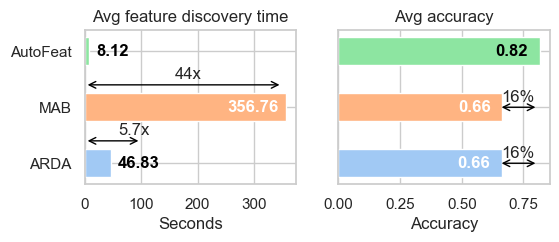

In [283]:
avgd_all = []

# a = dataframe.groupby(['approach', 'algorithm', 'data_label',])[['accuracy']].max().reset_index(level=['algorithm', 'data_label'])
a = dataframe.groupby(['approach', 'algorithm', 
                       'data_label'])[['feature_selection_time', 
                                       'train_time', 'accuracy']].max().reset_index(level=['algorithm', 
                                                                                           'data_label'])
a = a[~a['algorithm'].isin(['KNeighbors', 'LinearModel'])]
a = a[~a['data_label'].isin(['superconduct', 'air', 'yprop'])]



ARDA = a.loc['ARDA']
# ARDA = ARDA[~ARDA['data_label'].isin(['superconduct', 'yprop'])]


avgd = {}
avgd['approach'] = 'ARDA'
avgd['avg_acc'] = ARDA['accuracy'].mean()
avgd['avg_feat_sel_time'] = ARDA['feature_selection_time'].mean()
avgd['avg_train_time'] = ARDA['train_time'].mean()

avgd_all.append(avgd)


MAB = a.loc['MAB']
# MAB = MAB[~MAB['data_label'].isin(['superconduct', 'yprop'])]

avgd = {}
avgd['approach'] = 'MAB'
avgd['avg_acc'] = MAB['accuracy'].mean()
avgd['avg_feat_sel_time'] = MAB['feature_selection_time'].mean()
avgd['avg_train_time'] = MAB['train_time'].mean()
avgd_all.append(avgd)


TFD_BFS = a.loc['AutoFeat']
# TFD_BFS = TFD_BFS[~TFD_BFS['data_label'].isin(['superconduct', 'yprop'])]

avgd = {}
avgd['approach'] = 'AutoFeat'
avgd['avg_acc'] = TFD_BFS['accuracy'].mean()
avgd['avg_feat_sel_time'] = TFD_BFS['feature_selection_time'].mean()
avgd['avg_train_time'] = TFD_BFS['train_time'].mean()
avgd_all.append(avgd)


avgdf = pd.DataFrame(avgd_all)


pal = sns.color_palette("pastel")
sns.set(font_scale=1, style="whitegrid")


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

rects1 = ax1.barh(avgdf['approach'], avgdf['avg_feat_sel_time'], align='center', height=0.5, 
                  color=[pal[0], pal[1], pal[2]], 
                  )

rects2 = ax2.barh(avgdf['approach'], avgdf['avg_acc'], align='center', height=0.5,
                 color=[pal[0], pal[1], pal[2]],)

large_percentiles = [round(p, 2) if p > 50 else '' for p in avgdf['avg_feat_sel_time']]
small_percentiles = [round(p, 2) if p <= 50 else '' for p in avgdf['avg_feat_sel_time']]
ax1.bar_label(rects1, small_percentiles,
              padding=5, color='black', fontweight='bold')
ax1.bar_label(rects1, large_percentiles,
              padding=-42, color='white', fontweight='bold')


large_percentiles = [round(p, 2) if p > 0.7 else '' for p in avgdf['avg_acc']]
small_percentiles = [round(p, 2) if p <= 0.7 else '' for p in avgdf['avg_acc']]
ax2.bar_label(rects2, small_percentiles,
              padding=-32, color='white', fontweight='bold')
ax2.bar_label(rects2, large_percentiles,
              padding=-32, color='black', fontweight='bold')


ax1.set_xlabel('Seconds')
ax2.set_xlabel('Accuracy')

ax1.set_title('Avg feature discovery time')
ax2.set_title('Avg accuracy')

ax1.annotate('',xy=(100, 0.4),xytext=(0, 0.4), arrowprops=dict(arrowstyle="<->", color='black'))
ax1.annotate("5.7x", xy=(60, 0.5))

ax1.annotate('',xy=(350, 1.4),xytext=(0, 1.4), arrowprops=dict(arrowstyle="<->", color='black'))
ax1.annotate("44x", xy=(160, 1.5))

ax2.annotate('',xy=(0.81, 0),xytext=(0.65, 0), arrowprops=dict(arrowstyle="<->", color='black'))
ax2.annotate("16%", xy=(0.66, 0.1))

ax2.annotate('',xy=(0.81, 1),xytext=(0.65, 1), arrowprops=dict(arrowstyle="<->", color='black'))
ax2.annotate("16%", xy=(0.66, 1.1))


plt.savefig('plots/revision/crown.pdf', dpi=300, bbox_inches="tight")



In [74]:
print(total_time[total_time['approach'] == 'JoinAll']['total_time'].mean())

print(total_time[total_time['approach'] == 'AutoFeat']['total_time'].mean())

print(total_time[total_time['approach'] == 'JoinAllF']['total_time'].mean())



print(total_time[total_time['approach'] == 'JoinAllF']['feature_selection_time'].mean())

print(total_time[total_time['approach'] == 'AutoFeat']['feature_selection_time'].mean())

66.04667797258922
22.16886681318283
59.37442684173584
0.21736928394862579
8.115156769752502


In [179]:
# total_time[total_time['data_label'] == 'jannis']

total_time.groupby(by=['data_label', 'approach'])['accuracy'].mean('accuracy')

data_label    approach 
bioresponse   ARDA          0.608750
              AutoFeat      0.780568
              BASE          0.544396
              JoinAll       0.775837
              JoinAll+F     0.778748
              MAB           0.670670
covertype     ARDA          0.548750
              AutoFeat      0.938751
              BASE          0.502744
              JoinAll       0.953526
              JoinAll+F     0.911723
              MAB           0.621604
credit        ARDA          0.680000
              AutoFeat      0.747500
              BASE          0.643750
              JoinAll       0.735000
              JoinAll+F     0.745000
              MAB           0.670000
eyemove       ARDA          0.505000
              AutoFeat      0.643068
              BASE          0.506899
              JoinAll       0.657359
              JoinAll+F     0.619251
              MAB           0.548784
jannis        ARDA          0.551250
              AutoFeat      0.794026
              

# Benchmark - KNN + Linear

<Figure size 640x480 with 0 Axes>

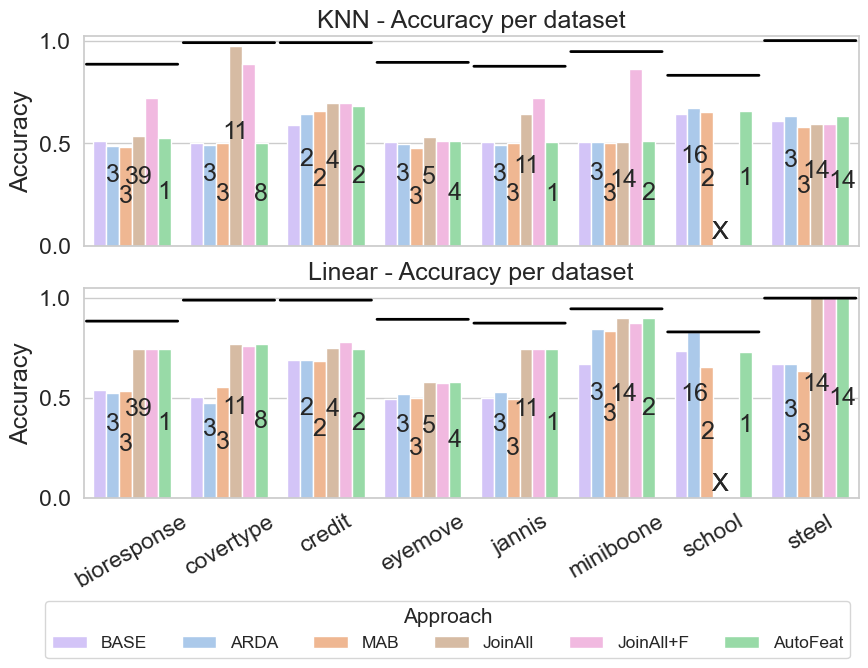

In [319]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


df_time = dataframe[dataframe['algorithm']=='KNeighbors']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
#                   palette=[pal[4], pal[0], pal[1], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
#                  ax=ax1)
                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll+F', 'AutoFeat'], ax=ax1)

ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.set_title("KNN - Accuracy per dataset")  
ax1.get_legend().remove()
ax1.bar_label(ax1.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)

autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, '', 14]

ax1.bar_label(ax1.containers[1], labels=arda_tables, label_type='center', padding=15)
ax1.bar_label(ax1.containers[2], labels=mab_tables, label_type='center')
ax1.bar_label(ax1.containers[3], labels=total_tables, label_type='center', padding=10)
ax1.bar_label(ax1.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)
ax1.bar_label(ax1.containers[5], labels=autofeat_tables, label_type='center')

ax1.annotate('',xy=(0.5, 0.885),xytext=(-0.5, 0.885), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(1.5, 0.99),xytext=(0.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(2.5, 0.99),xytext=(1.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(3.5, 0.894),xytext=(2.5, 0.894), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(4.5, 0.875),xytext=(3.5, 0.875), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(5.5, 0.9465),xytext=(4.5, 0.9465), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(6.5, 0.831),xytext=(5.5, 0.831), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(7.5, 1.0),xytext=(6.5, 1.0), arrowprops=dict(arrowstyle="-", color='black', lw=2))


df_time = dataframe[dataframe['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls,
                 palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll+F', 'AutoFeat'], ax=ax2)
#                  ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset")  
ax2.bar_label(ax2.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='center', padding=10)
ax2.bar_label(ax2.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)
ax2.bar_label(ax2.containers[5], labels=autofeat_tables, label_type='center')

ax2.annotate('',xy=(0.5, 0.885),xytext=(-0.5, 0.885), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(1.5, 0.99),xytext=(0.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(2.5, 0.99),xytext=(1.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(3.5, 0.894),xytext=(2.5, 0.894), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(4.5, 0.875),xytext=(3.5, 0.875), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(5.5, 0.9465),xytext=(4.5, 0.9465), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(6.5, 0.831),xytext=(5.5, 0.831), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(7.5, 1.0),xytext=(6.5, 1.0), arrowprops=dict(arrowstyle="-", color='black', lw=2))


loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')



plt.savefig('plots/revision/benchmark_linear_knn_accuracy.pdf', dpi=300, bbox_inches="tight")


In [78]:
knn = dataframe[dataframe['algorithm']=='KNeighbors']
knn[knn['data_label'] == 'credit'].groupby(by=['approach']).mean('accuracy')

,total_time,feature_selection_time,accuracy,train_time,cutoff_threshold,rank,top_k
approach,,,,,,,
ARDA,3.536389,3.390326,0.645,0.146063,NaN,NaN,NaN
AutoFeat,0.615278,0.388358,0.664,0.226920,0.65,0.97164,15.0
BASE,0.142320,0.000000,0.590,0.142320,NaN,NaN,NaN
JoinAll,0.457000,0.000000,0.695,0.249840,NaN,NaN,NaN
JoinAllF,0.395900,0.003011,0.695,0.185729,NaN,NaN,NaN
MAB,2.880000,2.880000,0.655,0.000000,NaN,NaN,NaN


In [339]:
knn = dataframe[dataframe['algorithm']=='KNeighbors']
knn.groupby(by=['data_label', 'approach']).mean('train_time')



total_time  feature_selection_time  accuracy  \
data_label  approach                                                    
bioresponse ARDA          52.001227               51.701897  0.486667   
            AutoFeat      43.377727               39.627401  0.491800   
            BASE           0.206107                0.000000  0.509461   
            JoinAll       40.419623                0.000000  0.534207   
            JoinAll+F     29.534172                0.074846  0.720524   
            MAB          249.550000              249.550000  0.481805   
covertype   ARDA          42.913154               42.662697  0.493333   
            AutoFeat      14.466271                6.942177  0.500531   
            BASE           1.101622                0.000000  0.502289   
            JoinAll      233.644128                0.000000  0.973057   
            JoinAll+F    228.389618                0.804420  0.887061   
            MAB           54.750000               54.750000  0.500189   
credit      ARDA           3.536389                3.390326  0.645000   
            AutoFeat       0.615278                0.388358  0.664000   
            BASE           0.142320                0.000000  0.590000   
            JoinAll        0.457000                0.000000  0.695000   
            JoinAll+F      0.395900                0.003011  0.695000   
            MAB            2.880000                2.880000  0.655000   
eyemove     ARDA          47.285389               47.100549  0.498333   
            AutoFeat       1.290622                0.459549  0.502081   
            BASE           0.198689                0.000000  0.504599   
            JoinAll        3.009727                0.000000  0.532194   
            JoinAll+F      2.417155                0.011015  0.512484   
            MAB           23.360000               23.360000  0.479632   
jannis      ARDA          47.386161               47.017040  0.493333   
            AutoFeat      21.687951                2.136092  0.501570   
            BASE           0.604366                0.000000  0.506339   
            JoinAll       67.557085                0.000000  0.644234   
            JoinAll+F     50.926710                0.254710  0.720042   
            MAB          769.100000              769.100000  0.501476   
miniboone   ARDA          20.828696               20.608685  0.506667   
            AutoFeat      27.934596                2.376915  0.505384   
            BASE           1.577182                0.000000  0.507808   
            JoinAll      104.973732                0.000000  0.506164   
            JoinAll+F     80.889637                0.364339  0.863219   
            MAB          795.420000              795.420000  0.503836   
school      ARDA         154.437392              153.726229  0.673239   
            AutoFeat      12.186289               11.954049  0.651643   
            BASE           0.150284                0.000000  0.645070   
            MAB        12865.680000            12865.680000  0.650704   
steel       ARDA           8.620846                8.403135  0.632391   
            AutoFeat       1.680152                1.036712  0.585261   
            BASE           0.126623                0.000000  0.606684   
            JoinAll        2.354235                0.000000  0.596401   
            JoinAll+F      1.625201                0.009243  0.596401   
            MAB            2.510000                2.510000  0.578406   

                       train_time  cutoff_threshold      rank  top_k  
data_label  approach                                                  
bioresponse ARDA         0.299330               NaN       NaN    NaN  
            AutoFeat     3.750326              0.65  0.874201   15.0  
            BASE         0.206107               NaN       NaN    NaN  
            JoinAll     16.564781               NaN       NaN    NaN  
            JoinAll+F    5.604485               NaN       NaN    NaN  
            MAB        

In [341]:
total_time.groupby(by=['data_label', 'approach']).mean('train_time')

total_time  feature_selection_time   accuracy  \
data_label   approach                                                    
bioresponse  ARDA         52.637735               51.701897   0.608750   
             AutoFeat     47.576943               39.627401   0.780568   
             BASE          0.956758                0.000000   0.544396   
             JoinAll      39.314447                0.000000   0.775837   
             JoinAll+F    30.392714                0.074846   0.778748   
             MAB          67.472500               67.472500   0.670670   
covertype    ARDA         43.576124               42.662697   0.548750   
             AutoFeat     83.050447                6.942177   0.938751   
             BASE         14.407986                0.000000   0.502744   
             JoinAll     299.344607                0.000000   0.953526   
             JoinAll+F   271.498218                0.804420   0.911723   
             MAB         314.847500              314.847500   0.621604   
credit       ARDA          4.129512                3.390326   0.680000   
             AutoFeat      1.334074                0.388358   0.747500   
             BASE          0.767558                0.000000   0.643750   
             JoinAll       1.156948                0.000000   0.735000   
             JoinAll+F     1.051348                0.003011   0.745000   
             MAB           7.950000                7.950000   0.670000   
eyemove      ARDA         48.004746               47.100549   0.505000   
             AutoFeat      2.060858                0.459549   0.643068   
             BASE          1.100143                0.000000   0.506899   
             JoinAll       3.311424                0.000000   0.657359   
             JoinAll+F     2.858266                0.011015   0.619251   
             MAB          30.775000               30.775000   0.548784   
jannis       ARDA         48.002004               47.017040   0.551250   
             AutoFeat     12.376502                2.136092   0.794026   
             BASE          3.423156                0.000000   0.556335   
             JoinAll      44.988886                0.000000   0.791681   
             JoinAll+F    41.117793                0.254710   0.799952   
             MAB         110.470000              110.470000   0.552080   
miniboone    ARDA         21.593658               20.608685   0.877500   
             AutoFeat     15.849688                2.376915   0.931387   
             BASE          3.593893                0.000000   0.694161   
             JoinAll      71.671914                0.000000   0.933048   
             JoinAll+F    66.453631                0.364339   0.916524   
             MAB          99.985000               99.985000   0.876729   
school       ARDA        155.374549              153.726229   0.813380   
             AutoFeat     12.925998               11.954049   0.697887   
             BASE          0.804906                0.000000   0.660563   
             MAB        2216.057500             2216.057500   0.683803   
steel        ARDA          9.356218                8.403135   0.715938   
             AutoFeat      2.176424                1.036712   0.995501   
             BASE          0.770668                0.000000   0.598972   
             JoinAll       2.538519                0.000000   0.997429   
             JoinAll+F     2.249018                0.009243   0.998072   
             MAB           6.497500                6.497500   0.694087   
superconduct MAB         111.512500              111.512500  10.134031   
yprop        MAB          36.135000               36.135000   0.028885   

                        train_time  cutoff_threshold      rank  top_k  
data_label   approach                                                  
bioresponse  ARDA         0.935838               NaN       NaN    NaN  
             AutoFeat     7.949542              0.65  0.854333   15.0  
             BASE         0.956758  

In [340]:
lr = dataframe[dataframe['algorithm']=='LinearModel']
lr.groupby(by=['data_label', 'approach']).mean('train_time')

total_time  feature_selection_time  accuracy  \
data_label  approach                                                    
bioresponse ARDA          52.192118               51.701897  0.526667   
            AutoFeat      47.246706               39.627401  0.645706   
            BASE           0.481316                0.000000  0.542940   
            JoinAll       59.390390                0.000000  0.745269   
            JoinAll+F     35.099364                0.074846  0.745269   
            MAB           41.790000               41.790000  0.535662   
covertype   ARDA          43.035694               42.662697  0.475000   
            AutoFeat      11.575961                6.942177  0.683982   
            BASE           1.385387                0.000000  0.505334   
            JoinAll      228.890242                0.000000  0.771254   
            JoinAll+F    226.449679                0.804420  0.762073   
            MAB           35.500000               35.500000  0.554983   
credit      ARDA           3.680638                3.390326  0.690000   
            AutoFeat       0.800559                0.388358  0.713000   
            BASE           0.411224                0.000000  0.690000   
            JoinAll        0.773468                0.000000  0.750000   
            JoinAll+F      0.603274                0.003011  0.780000   
            MAB            4.000000                4.000000  0.685000   
eyemove     ARDA          47.474378               47.100549  0.518333   
            AutoFeat       1.286808                0.459549  0.524967   
            BASE           0.375251                0.000000  0.494087   
            JoinAll        2.776435                0.000000  0.579501   
            JoinAll+F      2.222487                0.011015  0.577530   
            MAB           12.440000               12.440000  0.501971   
jannis      ARDA          47.503077               47.017040  0.531667   
            AutoFeat       7.088823                2.136092  0.672123   
            BASE           0.817550                0.000000  0.499739   
            JoinAll       42.637084                0.000000  0.744964   
            JoinAll+F     38.770698                0.254710  0.745137   
            MAB           16.910000               16.910000  0.494443   
miniboone   ARDA          21.185937               20.608685  0.843333   
            AutoFeat       9.823765                2.376915  0.864489   
            BASE           0.965925                0.000000  0.669726   
            JoinAll       75.082443                0.000000  0.899315   
            JoinAll+F     66.229652                0.364339  0.874384   
            MAB           21.310000               21.310000  0.833767   
school      ARDA         155.030168              153.726229  0.828169   
            AutoFeat      12.399270               11.954049  0.728638   
            BASE           0.316623                0.000000  0.738028   
            MAB        12499.000000            12499.000000  0.653521   
steel       ARDA           8.898667                8.403135  0.670951   
            AutoFeat       1.635783                1.036712  0.724079   
            BASE           0.248111                0.000000  0.668380   
            JoinAll        2.352386                0.000000  1.000000   
            JoinAll+F      1.804025                0.009243  1.000000   
            MAB            2.590000                2.590000  0.634961   

                       train_time  cutoff_threshold      rank  top_k  
data_label  approach                                                  
bioresponse ARDA         0.490221               NaN       NaN    NaN  
            AutoFeat     7.619305              0.65  0.874201   15.0  
            BASE         0.481316               NaN       NaN    NaN  
            JoinAll     35.535548               NaN       NaN    NaN  
            JoinAll+F   11.169677               NaN       NaN    NaN  
            MAB        

# Ablation - Relevance, redundancy

In [191]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark-final"
filename = "results_tfd_ablation.csv"
autofeat_filename = "results_autofeat.csv"


# Read data
ablation_df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename}"), header=0)
autofeat_df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{autofeat_filename}"), header=0)

ablation_df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
autofeat_df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
autofeat_df.loc[autofeat_df['approach']=='TFD_BFS', 'approach'] = 'Spearman-MRMR'


# Get globnal variables 
algs = list(ablation_df['algorithm'].unique())
print(algs)

tables = list(ablation_df['data_label'].unique())
print(tables)

approach = list(ablation_df['approach'].unique())
print(approach)

['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'credit', 'covertype', 'school']
['AutoFeat-Pearson-MRMR', 'AutoFeat-Pearson-JMI', 'AutoFeat-Spearman-JMI', 'AutoFeat_Red', 'AutoFeat_Rel']


In [192]:
a_idx = ablation_df[ablation_df['algorithm'] == 'XGBoost'].groupby(by=['data_label', 'approach'])['accuracy'].idxmax()
max_acc = ablation_df.loc[a_idx]
max_acc = max_acc[['data_label', 'approach', 'total_time', 'feature_selection_time', 'train_time', 'accuracy']]
max_acc


af_idx = autofeat_df[(autofeat_df['algorithm'] == 'XGBoost')].groupby(by=['data_label', 'approach'])['accuracy'].idxmax()
max_acc_af = autofeat_df.loc[af_idx]
max_acc_af = max_acc_af[['data_label', 'approach', 'total_time','feature_selection_time', 'train_time', 'accuracy']]
max_acc_af

,data_label,approach,total_time,feature_selection_time,train_time,accuracy
327,bioresponse,AutoFeat,54.803325,39.627401,15.175924,0.784571
477,covertype,AutoFeat,160.609625,6.942177,153.667447,0.967452
393,credit,AutoFeat,0.824797,0.388358,0.436439,0.750000
273,eyemove,AutoFeat,1.567921,0.459549,1.108371,0.658344
135,jannis,AutoFeat,9.068763,2.136092,6.932671,0.800278
243,miniboone,AutoFeat,15.512172,2.376915,13.135257,0.939726
489,school,AutoFeat,12.351127,11.954049,0.397079,0.709859
9,steel,AutoFeat,1.667572,1.036712,0.630860,1.000000


<Figure size 640x480 with 0 Axes>

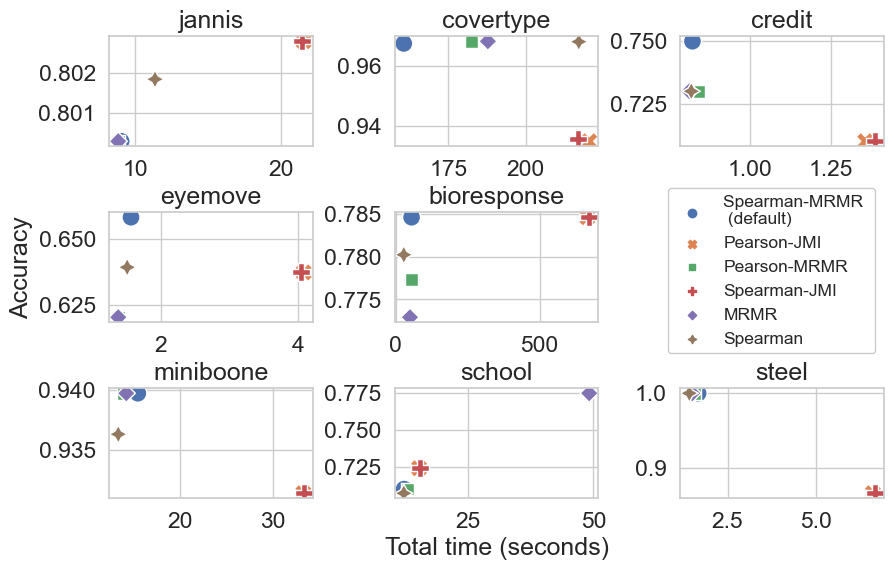

In [200]:
plot_data = pd.concat([max_acc_af, max_acc])
plot_data.loc[plot_data['approach']=='AutoFeat', 'approach'] = 'Spearman-MRMR \n (default)'
plot_data.loc[plot_data['approach']=='AutoFeat-Pearson-JMI', 'approach'] = 'Pearson-JMI'
plot_data.loc[plot_data['approach']=='AutoFeat-Pearson-MRMR', 'approach'] = 'Pearson-MRMR'
plot_data.loc[plot_data['approach']=='AutoFeat-Spearman-JMI', 'approach'] = 'Spearman-JMI'
plot_data.loc[plot_data['approach']=='AutoFeat_Red', 'approach'] = 'MRMR'
plot_data.loc[plot_data['approach']=='AutoFeat_Rel', 'approach'] = 'Spearman'

sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, axs = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

size=170

a00 = plot_data[plot_data['data_label'] == 'jannis']
sns.scatterplot(data=a00, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[0][0])
axs[0][0].get_legend().remove()
axs[0][0].set_xlabel('')
axs[0][0].set_ylabel('')
axs[0][0].set_title('jannis')

a01 = plot_data[plot_data['data_label'] == 'covertype']
sns.scatterplot(data=a01, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[0][1])
axs[0][1].get_legend().remove()
axs[0][1].set_xlabel('')
axs[0][1].set_ylabel('')
axs[0][1].set_title('covertype')

a02 = plot_data[plot_data['data_label'] == 'credit']
sns.scatterplot(data=a02, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[0][2])
axs[0][2].get_legend().remove()
axs[0][2].set_xlabel('')
axs[0][2].set_ylabel('')
axs[0][2].set_title('credit')



a10 = plot_data[plot_data['data_label'] == 'eyemove']
sns.scatterplot(data=a10, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[1][0])
axs[1][0].get_legend().remove()
axs[1][0].set_xlabel('')
axs[1][0].set_ylabel('Accuracy')
axs[1][0].set_title('eyemove')


a12 = plot_data[plot_data['data_label'] == 'bioresponse']
sns.scatterplot(data=a12, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[1][1])
axs[1][1].get_legend().remove()
axs[1][1].set_xlabel('')
axs[1][1].set_ylabel('')
axs[1][1].set_title('bioresponse')


a20 = plot_data[plot_data['data_label'] == 'miniboone']
sns.scatterplot(data=a20, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[2][0])
axs[2][0].get_legend().remove()
axs[2][0].set_xlabel('')
axs[2][0].set_ylabel('')
axs[2][0].set_title('miniboone')


a21 = plot_data[plot_data['data_label'] == 'school']
sns.scatterplot(data=a21, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[2][1])
axs[2][1].get_legend().remove()
axs[2][1].set_xlabel('Total time (seconds)')
axs[2][1].set_ylabel('')
axs[2][1].set_title('school')


a22 = plot_data[plot_data['data_label'] == 'steel']
sns.scatterplot(data=a22, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=size, ax=axs[2][2])
axs[2][2].set_xlabel('')
axs[2][2].set_ylabel('')
axs[2][2].set_title('steel')

axs[1][2].remove()

hh, ll = axs[0][2].get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(1, 2.9), ncol=1,  facecolor='white',
           framealpha=1, fontsize="x-small", title_fontsize='small')

plt.savefig('plots/revision/ablation_rel_red.pdf', dpi=300, bbox_inches="tight")

# Lake - Acc + feature selection time - Tree

In [320]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/lake-final"
tfd_filename = "results_autofeat_path.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])


# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)
dataframe['feature_selection_time'] = dataframe['feature_selection_time'].fillna(0)


['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['credit', 'steel', 'jannis', 'miniboone', 'covertype', 'eyemove', 'bioresponse', 'school', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE']


<Figure size 640x480 with 0 Axes>

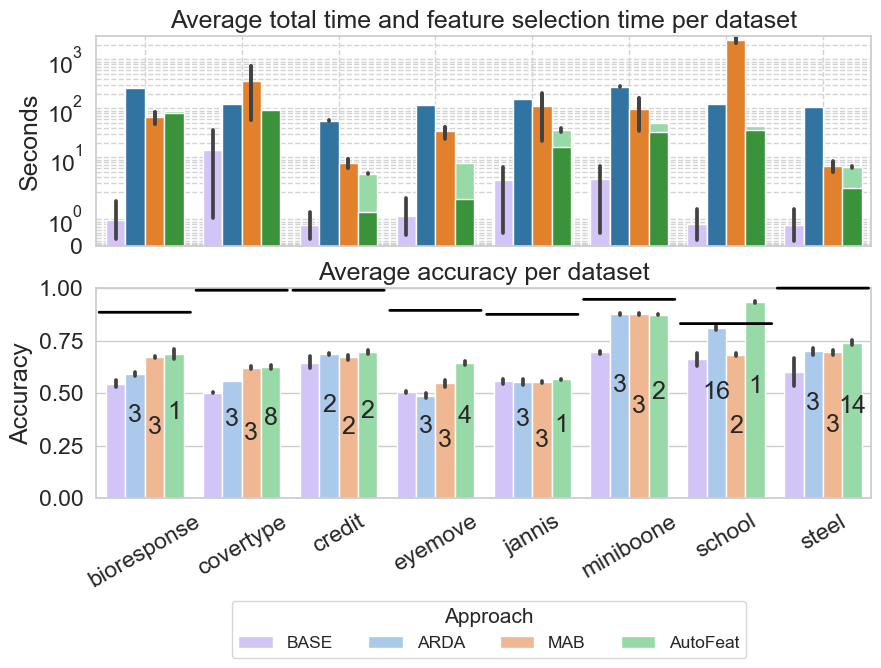

In [321]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")
pal2 = sns.color_palette('tab10')


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# df_basic.sort_values('data_label')

time_variable = 'feature_selection_time'
df = dataframe[dataframe['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]

# total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', time_variable])[['accuracy']].idxmax()
total_time = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]
taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]

accuracy_cls = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]

# accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y='total_time', hue="approach", 
                data=taux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
#                 palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)

ax1 = sns.barplot(x="data_label", y=time_variable, hue="approach", 
                data=taux, 
                palette=[pal2[4], pal2[0], pal2[1], pal2[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
#                 palette=[pal2[4], pal2[0], pal2[1], pal2[5], pal2[6], pal2[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)




ax1.set_title("Average total time and feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('symlog')
# ax1.set_ylim()
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')




ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset")  
ax2.set_yticks(np.arange(0, 1.1, 0.25))


autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, 'X', 14]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
# ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='edge')
# ax2.bar_label(ax2.containers[4], labels=total_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=autofeat_tables, label_type='center', padding=10)

ax2.annotate('',xy=(0.5, 0.885),xytext=(-0.5, 0.885), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(1.5, 0.99),xytext=(0.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(2.5, 0.99),xytext=(1.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(3.5, 0.894),xytext=(2.5, 0.894), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(4.5, 0.875),xytext=(3.5, 0.875), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(5.5, 0.9465),xytext=(4.5, 0.9465), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(6.5, 0.831),xytext=(5.5, 0.831), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(7.5, 1.0),xytext=(6.5, 1.0), arrowprops=dict(arrowstyle="-", color='black', lw=2))



loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.85, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')

plt.savefig('plots/revision/lake-all.pdf', dpi=300, bbox_inches="tight")

# Lake - KNN + Linear

<Figure size 640x480 with 0 Axes>

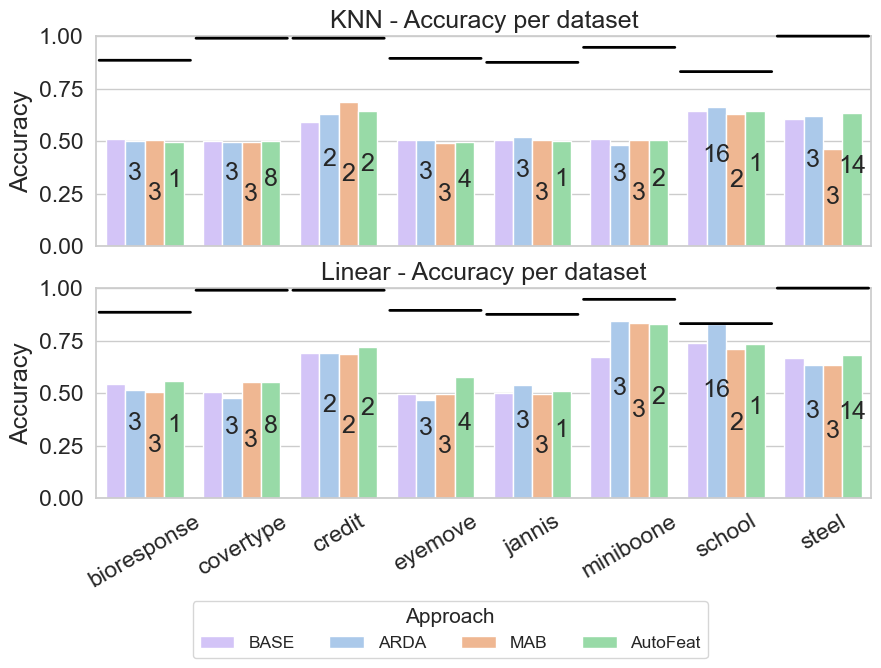

In [322]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


timevar = 'total_time'
df_time = dataframe[dataframe['algorithm']=='KNeighbors']
# df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                 ax=ax1)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax2)

ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.set_title("KNN - Accuracy per dataset")  
ax1.get_legend().remove()
ax1.set_yticks(np.arange(0, 1.1, 0.25))

autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, 'X', 14]

ax1.bar_label(ax1.containers[1], labels=arda_tables, label_type='center', padding=15)
ax1.bar_label(ax1.containers[2], labels=mab_tables, label_type='center')
# ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='edge')
# ax2.bar_label(ax2.containers[4], labels=total_tables, label_type='center')
ax1.bar_label(ax1.containers[3], labels=autofeat_tables, label_type='center', padding=10)

ax1.annotate('',xy=(0.5, 0.885),xytext=(-0.5, 0.885), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(1.5, 0.99),xytext=(0.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(2.5, 0.99),xytext=(1.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(3.5, 0.894),xytext=(2.5, 0.894), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(4.5, 0.875),xytext=(3.5, 0.875), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(5.5, 0.9465),xytext=(4.5, 0.9465), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(6.5, 0.831),xytext=(5.5, 0.831), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax1.annotate('',xy=(7.5, 1.0),xytext=(6.5, 1.0), arrowprops=dict(arrowstyle="-", color='black', lw=2))

# loc, labels = plt.xticks()
# hh, ll = plt.gca().get_legend_handles_labels()

# ax2.set_xticklabels(labels, rotation=30)
# plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')


df_time = dataframe[dataframe['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls,
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
#                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)
                 ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset") 
ax2.set_yticks(np.arange(0, 1.1, 0.25))


ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
# ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='edge')
# ax2.bar_label(ax2.containers[4], labels=total_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=autofeat_tables, label_type='center', padding=10)

ax2.annotate('',xy=(0.5, 0.885),xytext=(-0.5, 0.885), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(1.5, 0.99),xytext=(0.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(2.5, 0.99),xytext=(1.5, 0.99), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(3.5, 0.894),xytext=(2.5, 0.894), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(4.5, 0.875),xytext=(3.5, 0.875), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(5.5, 0.9465),xytext=(4.5, 0.9465), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(6.5, 0.831),xytext=(5.5, 0.831), arrowprops=dict(arrowstyle="-", color='black', lw=2))
ax2.annotate('',xy=(7.5, 1.0),xytext=(6.5, 1.0), arrowprops=dict(arrowstyle="-", color='black', lw=2))

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.8, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')



plt.savefig('plots/revision/lake_linear_knn_accuracy.pdf', dpi=300, bbox_inches="tight")


In [289]:
dataframe[dataframe['algorithm']=='KNeighbors'].groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

,data_label,approach,accuracy
0,all,MAB,0.506164
1,bioresponse,ARDA,0.498333
2,bioresponse,AutoFeat,0.497817
3,bioresponse,BASE,0.509461
4,bioresponse,MAB,0.503639
5,covertype,ARDA,0.496667
6,covertype,AutoFeat,0.500389
7,covertype,BASE,0.502289
8,covertype,MAB,0.497923
9,credit,ARDA,0.630000
